# DATA 604 - FINAL PROJECT :  SIMULATION OF DMV WAIT TIMES

## Lisa Szydziak
## July 12, 2022




### Problem:

Using SimPy, write a process simulation that includes waiting time (discrete event simulation). You may use any topic of interest to you. Write the simulation and all of the following in Jupyter.

Each element is worth 5 points and will be graded using the rubric shown here.

**1. State the problem and its significance.**


Waiting in line at the department of motor vehicles or motor vehicle registry is a necessity of modern day living which is unavoidable. Customers dread this situation in which you must appear in person because of the insanely long waits at the registry. 

Simulate wait time at the Department of Motor Vehicles (DMV).  This information can be helpful in reducing wait time by adding additional servers at busy times when wait times are expected to exceed a reasonable time.

Let's take a look at a couple of simulations using 1,2,3 servers based on exponential customer arrival times and service times and plot the results.

**2.  Provide a flow-chart model.**

The flow chart below depicts the flow of a customer at the DMV.

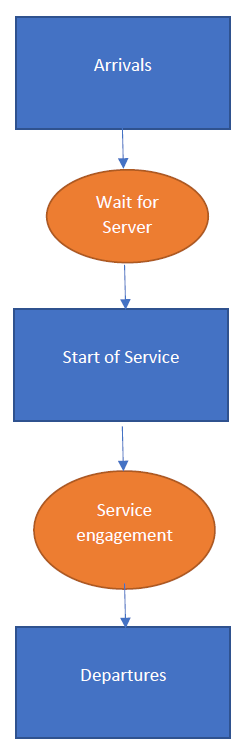

In [1]:
from IPython.display import Image
Image(filename = "flow1.png", width = 200, height = 100)

In order to reduce the wait time in this model, adding more servers that service the single line will result in lower wait times and shorter lines. This can be seen in the two side by side flow charts.  For example, the left chart is a single server and the right chart displays 3 servers.  

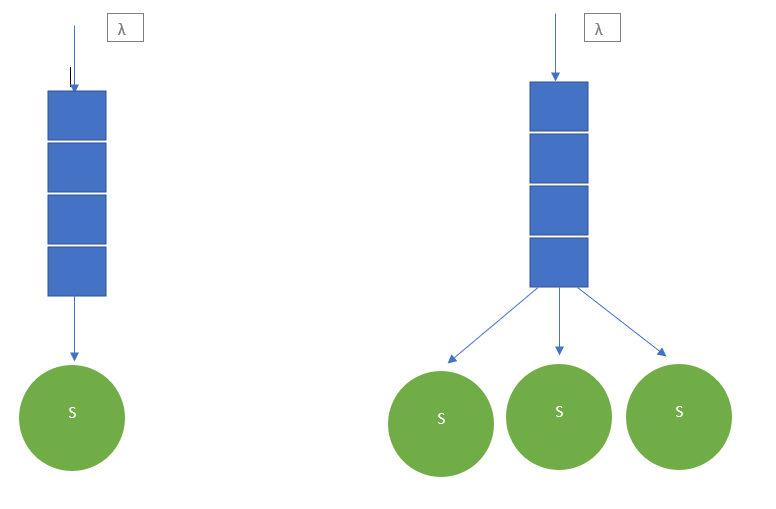

In [2]:

Image(filename = "flow2a.png", width = 600, height = 300)

Let's try to simulate the model with 1 server, then repeat with 2, 3 servers.

Suppose we are given the information:
    
    The average time to serve a customer is 10 minutes, or in order words, .1 customers are served per minute.
    
    The average time between customers arriving is 3.3 minutes, or .3 customers arrive per minute.
    
Let's assume these times are exponentially distributed.


In [3]:
import simpy
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats


In [4]:
NUMBER_OF_EMPLOYEES1=1
CUSTOMERS_SERVED_PER_MINUTE1=.1
CUSTOMERS_ARRIVING_PER_MINUTE1=.3
SIMULATION_TIME1=120


customer_arrived=0
customer_with_server=0
customers_handled=0



def generate_interarrival():
    return np.random.exponential(1./CUSTOMERS_ARRIVING_PER_MINUTE1)

def generate_service():
    return np.random.exponential(1./CUSTOMERS_SERVED_PER_MINUTE1)

def registry(env,servers):
    i=0
    while True:
        i += 1
        yield env.timeout(generate_interarrival())
        env.process(customer(env,i, servers))
        

       
tot_t=[]
service_t=[]
queue_t=[]


def customer(env,customer, servers):
    global customers_handled
    global customers_arrived
    global customer_with_server
    with servers.request() as request:
        t_arrival=env.now
        print (env.now, 'customer {} arrives'.format(customer))
        customers_arrived=customer
        yield request
        print (env.now, 'customer {} is being served'.format(customer))
        customer_with_server=customer
        t_serve=env.now
        yield env.timeout(generate_service())
        print (env.now, 'customer {} departs'.format(customer))
        t_depart=env.now
        tot_t.append(t_depart-t_arrival)
        service_t.append(t_depart-t_serve)
        queue_t.append(t_serve-t_arrival)
        customers_handled=customer
        
        
        
obs_times=[]
q_length=[]

def observe(env, servers):
    while True:
        obs_times.append(env.now)
        q_length.append(len(servers.queue))
        yield env.timeout(0.5)

np.random.seed(24400)
        
env=simpy.Environment()

servers=simpy.Resource(env, capacity=NUMBER_OF_EMPLOYEES1)

env.process(registry(env,servers))
env.process(observe(env,servers))
            
            
env.run(until=SIMULATION_TIME1)
            

      



0.14624127844428425 customer 1 arrives
0.14624127844428425 customer 1 is being served
0.41854463050909413 customer 2 arrives
0.608589561988669 customer 3 arrives
1.5900317205020897 customer 4 arrives
1.93899649915988 customer 1 departs
1.93899649915988 customer 2 is being served
2.2802460271838054 customer 5 arrives
6.762223993436342 customer 2 departs
6.762223993436342 customer 3 is being served
6.776627034487789 customer 6 arrives
7.502117961346676 customer 7 arrives
26.989735817615298 customer 3 departs
26.989735817615298 customer 4 is being served
29.04117180233679 customer 4 departs
29.04117180233679 customer 5 is being served
31.50452355609548 customer 8 arrives
33.04986993117447 customer 9 arrives
34.46129862802505 customer 5 departs
34.46129862802505 customer 6 is being served
35.42479396021173 customer 6 departs
35.42479396021173 customer 7 is being served
39.6864574051166 customer 7 departs
39.6864574051166 customer 8 is being served
44.20849873861552 customer 10 arrives
44.6

In [5]:
print("Customers_handled (1 server): " +str(customers_handled))
print("Customers_arrived (1 server): " +str(customers_arrived))
print("CustomerID_with_service (1 server): " +str(customer_with_server))
print("Length of queue (1 server): " +str(customers_arrived-customer_with_server))
print("Average Customer Queue time (1 server): " +str(sum(queue_t)/customers_handled))
print("Average Customer Service time (1 server): " +str(sum(service_t)/customers_handled))
print("Average Customer Total Q+S time (1 server): " +str(sum(tot_t)/customers_handled))
print("Customer Arrival rate (1 server): " +str(customers_arrived/SIMULATION_TIME1))
print("Customer Service rate (1 server): " +str(customers_handled/sum(service_t)))

print("t-test: "+str(stats.ttest_1samp(a=service_t, popmean=10)))

Customers_handled (1 server): 14
Customers_arrived (1 server): 27
CustomerID_with_service (1 server): 15
Length of queue (1 server): 12
Average Customer Queue time (1 server): 14.517493727578339
Average Customer Service time (1 server): 7.148903884702712
Average Customer Total Q+S time (1 server): 21.666397612281052
Customer Arrival rate (1 server): 0.225
Customer Service rate (1 server): 0.13988158410407628
t-test: Ttest_1sampResult(statistic=-1.4730215732887186, pvalue=0.16454125210818848)


**Generate appropriate graphs (more than one) to illustrate the results**

Text(0.5, 1.0, 'WAITING QUEUE TIME OF CUSTOMERS  - 1 server')

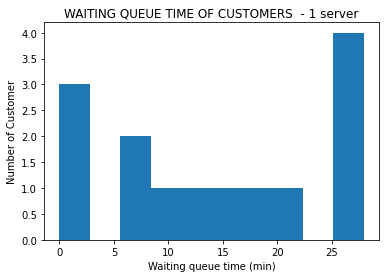

In [6]:
plt.figure()
plt.hist(queue_t)
plt.xlabel('Waiting queue time (min)')
plt.ylabel('Number of Customer')
plt.title("WAITING QUEUE TIME OF CUSTOMERS  - 1 server")

Text(0.5, 1.0, 'SERVICE TIME OF CUSTOMERS  - 1 server')

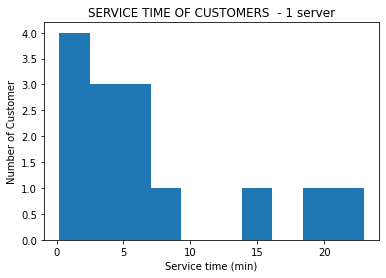

In [7]:
plt.figure()
plt.hist(service_t)
plt.xlabel('Service time (min)')
plt.ylabel('Number of Customer')
plt.title("SERVICE TIME OF CUSTOMERS  - 1 server")

Text(0.5, 1.0, 'Total Q+S TIME OF CUSTOMERS  - 1 server')

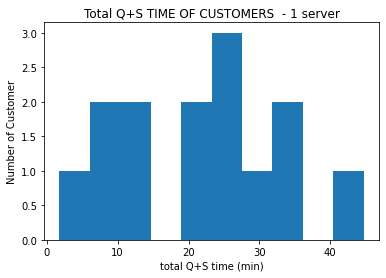

In [8]:
plt.figure()
plt.hist(tot_t)
plt.xlabel('total Q+S time (min)')
plt.ylabel('Number of Customer')
plt.title("Total Q+S TIME OF CUSTOMERS  - 1 server")

At the opening of the DMV, there is no line.  In this system, the line and therefore the wait time will increase if customers are not serviced in an adequate amount of time.  

With the notion in mind that the line is growing, let's take a look at the length of the line over time.

Text(0.5, 1.0, 'LENGTH OF QUEUE AT GIVEN TIME - 1 server')

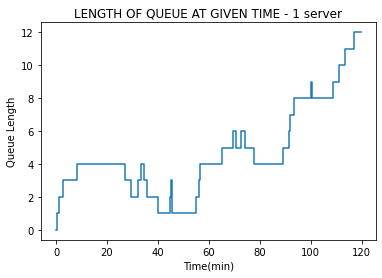

In [9]:
plt.figure()
plt.step(obs_times,q_length,where='post')
plt.xlabel('Time(min)')
plt.ylabel('Queue Length')
plt.title("LENGTH OF QUEUE AT GIVEN TIME - 1 server")

The line starts to grow quite starkly.

This situation is not going to work, let's add another server to our simulation.

In [10]:
NUMBER_OF_EMPLOYEES2=2
CUSTOMERS_SERVED_PER_MINUTE2=.1
CUSTOMERS_ARRIVING_PER_MINUTE2=.3
SIMULATION_TIME2=120


customer_arrived2=0
customer_with_server2=0
customers_handled2=0


def generate_interarrival():
    return np.random.exponential(1./CUSTOMERS_ARRIVING_PER_MINUTE2)

def generate_service():
    return np.random.exponential(1./CUSTOMERS_SERVED_PER_MINUTE2)

def registry(env,servers):
    i=0
    while True:
        i += 1
        yield env.timeout(generate_interarrival())
        env.process(customer(env,i, servers))
        

tot_t=[]
service_t=[]
queue_t=[]


def customer(env,customer, servers):
    global customers_handled2
    global customers_arrived2
    global customer_with_server2
    with servers.request() as request:
        t_arrival=env.now
        print (env.now, 'customer {} arrives'.format(customer))
        customers_arrived2=customer
        yield request
        print (env.now, 'customer {} is being served'.format(customer))
        customer_with_server2=customer
        t_serve=env.now
        yield env.timeout(generate_service())
        print (env.now, 'customer {} departs'.format(customer))
        t_depart=env.now
        tot_t.append(t_depart-t_arrival)
        service_t.append(t_depart-t_serve)
        queue_t.append(t_serve-t_arrival)
        customers_handled2=customer
        
        
        
obs_times=[]
q_length=[]

def observe(env, servers):
    while True:
        obs_times.append(env.now)
        q_length.append(len(servers.queue))
        yield env.timeout(0.5)

np.random.seed(24400)
        
env=simpy.Environment()

servers=simpy.Resource(env, capacity=NUMBER_OF_EMPLOYEES2)

env.process(registry(env,servers))
env.process(observe(env,servers))
            
            


<Process(observe) object at 0x16f5613b9a0>

In [11]:
env.run(until=SIMULATION_TIME2)

0.14624127844428425 customer 1 arrives
0.14624127844428425 customer 1 is being served
0.41854463050909413 customer 2 arrives
0.41854463050909413 customer 2 is being served
0.608589561988669 customer 3 arrives
1.2988038686703849 customer 4 arrives
1.93899649915988 customer 1 departs
1.93899649915988 customer 3 is being served
2.9065463667625386 customer 5 arrives
3.3628711060493566 customer 2 departs
3.3628711060493566 customer 4 is being served
5.539343886626019 customer 4 departs
5.539343886626019 customer 5 is being served
9.649050308155525 customer 6 arrives
10.33286230306269 customer 7 arrives
12.139571244958777 customer 8 arrives
13.684917620037764 customer 9 arrives
15.42813952107183 customer 3 departs
15.42813952107183 customer 6 is being served
16.391634853258516 customer 6 departs
16.391634853258516 customer 7 is being served
20.653298298163385 customer 7 departs
20.653298298163385 customer 8 is being served
24.843546427478813 customer 10 arrives
25.29461125139579 customer 11 

Customers_handled (2 server): 21
Customers_arrived (2 server): 31
CustomerID_with_service (2 server): 22
Length of queue (2 server): 9
Average Customer Queue time (2 server): 16.05774073711202
Average Customer Service time (2 server): 10.479464298557286
Average Customer Total Q+S time (2 server): 26.537205035669302
Customer Arrival rate (2 server): 0.25833333333333336
Customer Service rate (2 server): 0.09542472511096493
t-test: Ttest_1sampResult(statistic=0.2811656131408623, pvalue=0.7816224870976518)


Text(0.5, 1.0, 'LENGTH OF QUEUE AT GIVEN TIME - 2 SERVER MODEL')

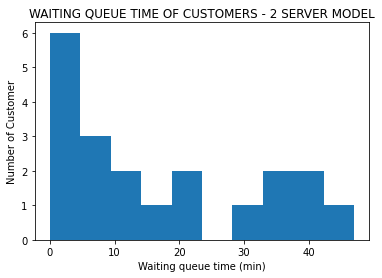

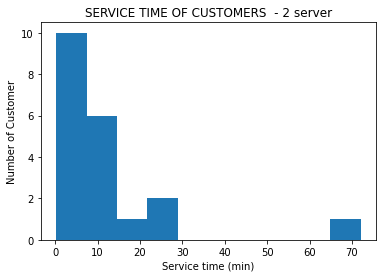

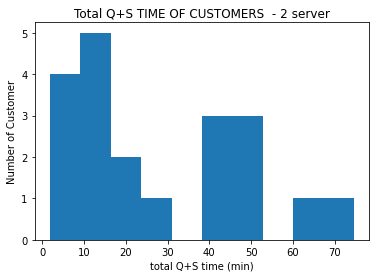

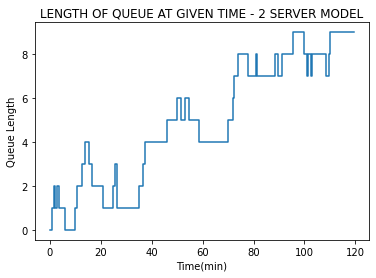

In [12]:
print("Customers_handled (2 server): " +str(customers_handled2))
print("Customers_arrived (2 server): " +str(customers_arrived2))
print("CustomerID_with_service (2 server): " +str(customer_with_server2))
print("Length of queue (2 server): " +str(customers_arrived2-customer_with_server2))
print("Average Customer Queue time (2 server): " +str(sum(queue_t)/customers_handled2))
print("Average Customer Service time (2 server): " +str(sum(service_t)/customers_handled2))
print("Average Customer Total Q+S time (2 server): " +str(sum(tot_t)/customers_handled2))
print("Customer Arrival rate (2 server): " +str(customers_arrived2/SIMULATION_TIME2))
print("Customer Service rate (2 server): " +str(customers_handled2/sum(service_t)))

print("t-test: "+str(stats.ttest_1samp(a=service_t, popmean=10)))


plt.figure()
plt.hist(queue_t)
plt.xlabel('Waiting queue time (min)')
plt.ylabel('Number of Customer')
plt.title("WAITING QUEUE TIME OF CUSTOMERS - 2 SERVER MODEL")

plt.figure()
plt.hist(service_t)
plt.xlabel('Service time (min)')
plt.ylabel('Number of Customer')
plt.title("SERVICE TIME OF CUSTOMERS  - 2 server")

plt.figure()
plt.hist(tot_t)
plt.xlabel('total Q+S time (min)')
plt.ylabel('Number of Customer')
plt.title("Total Q+S TIME OF CUSTOMERS  - 2 server")

plt.figure()
plt.step(obs_times,q_length,where='post')
plt.xlabel('Time(min)')
plt.ylabel('Queue Length')
plt.title("LENGTH OF QUEUE AT GIVEN TIME - 2 SERVER MODEL")



 The 2 server model shown above resulted in the queue length growing markedly.
 
 Let's try 3 server's...................

In [13]:
NUMBER_OF_EMPLOYEES3=3
CUSTOMERS_SERVED_PER_MINUTE3=.1
CUSTOMERS_ARRIVING_PER_MINUTE3=.3
SIMULATION_TIME3=120


customer_arrived3=0
customer_with_server3=0
customers_handled3=0


def generate_interarrival():
    return np.random.exponential(1./CUSTOMERS_ARRIVING_PER_MINUTE3)

def generate_service():
    return np.random.exponential(1./CUSTOMERS_SERVED_PER_MINUTE3)

def registry(env,servers):
    i=0
    while True:
        i += 1
        yield env.timeout(generate_interarrival())
        env.process(customer(env,i, servers))
        
tot_t=[]
service_t=[]
queue_t=[]


def customer(env,customer, servers):
    global customers_handled3
    global customers_arrived3
    global customer_with_server3
    with servers.request() as request:
        t_arrival=env.now
        print (env.now, 'customer {} arrives'.format(customer))
        customers_arrived3=customer
        yield request
        print (env.now, 'customer {} is being served'.format(customer))
        customer_with_server3=customer
        t_serve=env.now
        yield env.timeout(generate_service())
        print (env.now, 'customer {} departs'.format(customer))
        t_depart=env.now
        tot_t.append(t_depart-t_arrival)
        service_t.append(t_depart-t_serve)
        queue_t.append(t_serve-t_arrival)
        customers_handled3=customer
        
        
        
obs_times=[]
q_length=[]

def observe(env, servers):
    while True:
        obs_times.append(env.now)
        q_length.append(len(servers.queue))
        yield env.timeout(0.5)

np.random.seed(24400)
        
env=simpy.Environment()

servers=simpy.Resource(env, capacity=NUMBER_OF_EMPLOYEES3)

env.process(registry(env,servers))
env.process(observe(env,servers))
            
            


np.random.seed(24400)
        
env=simpy.Environment()

servers=simpy.Resource(env, capacity=NUMBER_OF_EMPLOYEES3)

env.process(registry(env,servers))
env.process(observe(env,servers))
            
            


<Process(observe) object at 0x16f562fd100>

In [14]:
env.run(until=SIMULATION_TIME3)

0.14624127844428425 customer 1 arrives
0.14624127844428425 customer 1 is being served
0.41854463050909413 customer 2 arrives
0.41854463050909413 customer 2 is being served
0.608589561988669 customer 3 arrives
0.608589561988669 customer 3 is being served
1.2988038686703849 customer 4 arrives
1.93899649915988 customer 1 departs
1.93899649915988 customer 4 is being served
3.3628711060493566 customer 2 departs
5.431817056265131 customer 3 departs
5.7951848759743685 customer 5 arrives
5.7951848759743685 customer 5 is being served
6.520675802833256 customer 6 arrives
6.520675802833256 customer 6 is being served
7.204487797740421 customer 7 arrives
8.749834172819408 customer 8 arrives
11.940802628521517 customer 6 departs
11.940802628521517 customer 7 is being served
12.904297960708202 customer 7 departs
12.904297960708202 customer 8 is being served
17.16596140561307 customer 8 departs
19.908462980260456 customer 9 arrives
19.908462980260456 customer 9 is being served
21.261657452011388 custo

Customers_handled (3 server): 27
Customers_arrived (3 server): 28
CustomerID_with_service (3 server): 28
Length of queue (3 server): 0
Average Customer Queue time (3 server): 3.1180898453008323
Average Customer Service time (3 server): 10.744879534022072
Average Customer Total Q+S time (3 server): 13.862969379322907
Customer Arrival rate (3 server): 0.23333333333333334
Customer Service rate (3 server): 0.09306758599141553
t-test: Ttest_1sampResult(statistic=0.1330085201064279, pvalue=0.8951730101559207)


Text(0.5, 1.0, 'LENGTH OF QUEUE AT GIVEN TIME - 3 SERVER MODEL')

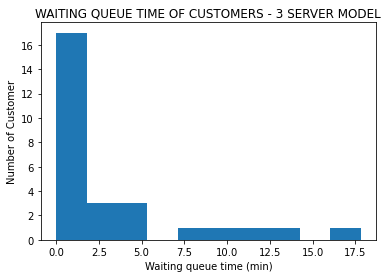

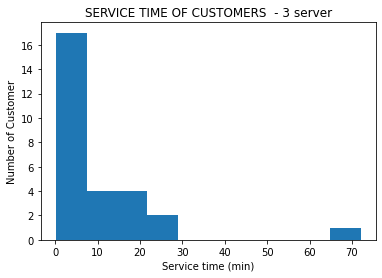

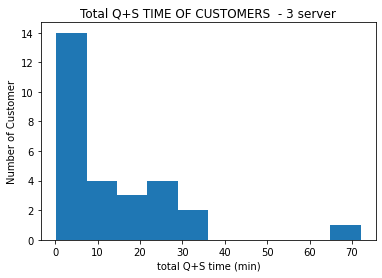

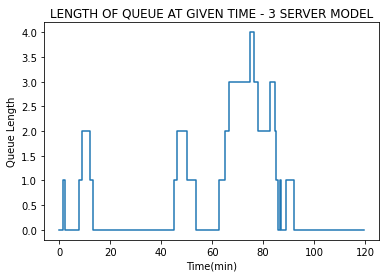

In [15]:
print("Customers_handled (3 server): " +str(customers_handled3))
print("Customers_arrived (3 server): " +str(customers_arrived3))
print("CustomerID_with_service (3 server): " +str(customer_with_server3))
print("Length of queue (3 server): " +str(customers_arrived3-customer_with_server3))
print("Average Customer Queue time (3 server): " +str(sum(queue_t)/customers_handled3))
print("Average Customer Service time (3 server): " +str(sum(service_t)/customers_handled3))
print("Average Customer Total Q+S time (3 server): " +str(sum(tot_t)/customers_handled3))
print("Customer Arrival rate (3 server): " +str(customers_arrived3/SIMULATION_TIME3))
print("Customer Service rate (3 server): " +str(customers_handled3/sum(service_t)))
print("t-test: "+str(stats.ttest_1samp(a=service_t, popmean=10)))


plt.figure()
plt.hist(queue_t)
plt.xlabel('Waiting queue time (min)')
plt.ylabel('Number of Customer')
plt.title("WAITING QUEUE TIME OF CUSTOMERS - 3 SERVER MODEL")

plt.figure()
plt.hist(service_t)
plt.xlabel('Service time (min)')
plt.ylabel('Number of Customer')
plt.title("SERVICE TIME OF CUSTOMERS  - 3 server")

plt.figure()
plt.hist(tot_t)
plt.xlabel('total Q+S time (min)')
plt.ylabel('Number of Customer')
plt.title("Total Q+S TIME OF CUSTOMERS  - 3 server")

plt.figure()
plt.step(obs_times,q_length,where='post')
plt.xlabel('Time(min)')
plt.ylabel('Queue Length')
plt.title("LENGTH OF QUEUE AT GIVEN TIME - 3 SERVER MODEL")



The model with 3 servers reduces the wait time and the queue length to a reasonable, comfortable amount.  

**Justify the validity of the model and discuss how you verified it.**

The problem of understanding DMV wait times is a subject that has been carefully scrutinized.  Does the conceptual model represent the real system accurately?

Although a random seed was set for descriptive and illustrative purposes, the simulations were run several times (n=120) with consistent results assuring verification and validation.  Again, the model was built with the ability to change parameters:  simulation time, servers, customer arrival time, service time.


## Validation

ref:  https://www.tutorialspoint.com/modelling_and_simulation/modelling_and_simulation_verification_validation.htm

"Validation is the process of comparing two results. In this process, we need to compare the representation of a conceptual model to the real system. If the comparison is true, then it is valid, else invalid."  

The model's key assumptions lie in customers arriving and customers serviced.  We have assumed these parameters based on educated guesses and research as part of the validation.  

The model is built so that these parameters can be adjusted as well.

The average time to serve a customer is 10 minutes, or in order words, .1 customers are served per minute.
    
The average time between customers arriving is 3.3 minutes, or .3 customers arrive per minute.
    
Let's assume these times are exponentially distributed.

We ran 3 simulations (1, 2, 3 servers) with 120 iterations.

Here is a summary of the output values:
    
    

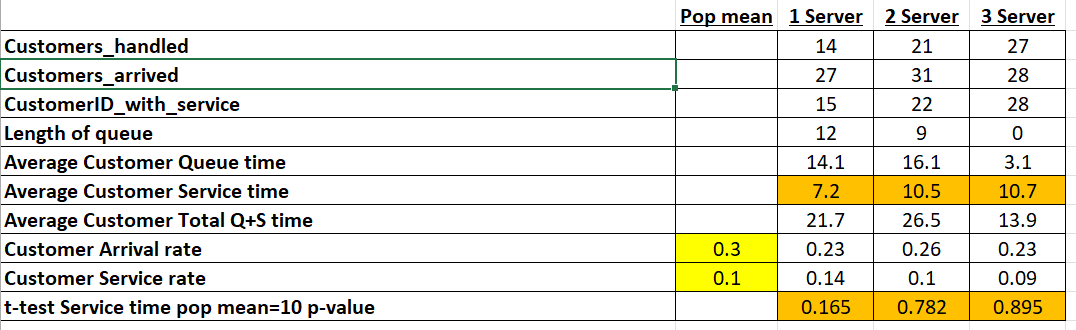

In [16]:
from IPython.display import Image
Image(filename = "table.png", width =4200, height = 400)

From the table above, the assumption of customer arrival rate=.3 and the simulations produced similar results: .23, .26, .23.

Also, the assumption of customer service rate=.1 and the simulations produced: .14, .1, .09.

Furthermore, the assumption of average customer service time=10 and the simulations produced: 7.2, 10.5, 10.7

For illustrative purposes, a one sample t-test using population mean customer service time=10 resulted in no significant difference.

The simulation of the 3-server model has produced a service time plot depicted an exponential distribution as output below.  This was the assumption on input.

The plots for the server2 and server1 shown previouslyis similar in shape.



Text(0.5, 1.0, 'SERVICE TIME OF CUSTOMERS  - 3 server')

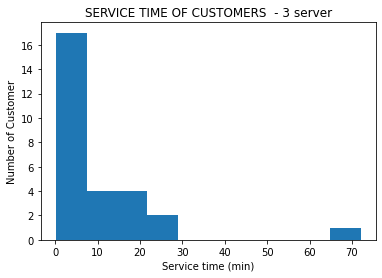

In [17]:
plt.figure()
plt.hist(service_t)
plt.xlabel('Service time (min)')
plt.ylabel('Number of Customer')
plt.title("SERVICE TIME OF CUSTOMERS  - 3 server")


"Verification is the process of comparing two or more results to ensure its accuracy. In this process, we have to compare the model’s implementation and its associated data with the developer's conceptual description and specifications."  

The flow charts depict the flow of customers in the actual system and the model follows this flow. The flow chart specifies 1)  customer enters, 2) customers may wait, 3)  customers are served, 4) customers depart.  

Below we can trace the flow of customer 1 in the first simulation and confirm that the model is performing as conceptualized.



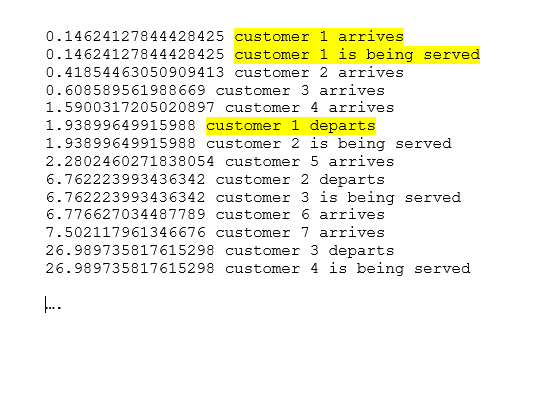

In [18]:
Image(filename = "excerpt_sim.png", width = 600, height = 300)

**State  your conclusions/ findings from the model.** 

Conclusions:

This model does accomplish the goal of simulating the queue at a DMV.  The model was run with 1,2 and 3 servers. Reviewing the results of the simulations, it can be concluded that a 3 server configuration adequately serves the customers. 

From California's DMV blog:  "DMV’s existing goals are for wait times (amount of time in the queue) to not exceed 45 minutes for customers without an appointment or 15 minutes for customers with an appointment. "

In conclusion, it is apparent the 3 server configuration meets this goal.  Future endeavors could improve this simpler model by adding servers periodically, modifying to allow for appointment/non-appointment queues, changing arrival time distribution throughout the day to name a few.





Be sure that your code works!